# CRO Algorithm examples

## Example I: max_ones problem

[*Running Test v0.0.5] Initialization:  max_ones max


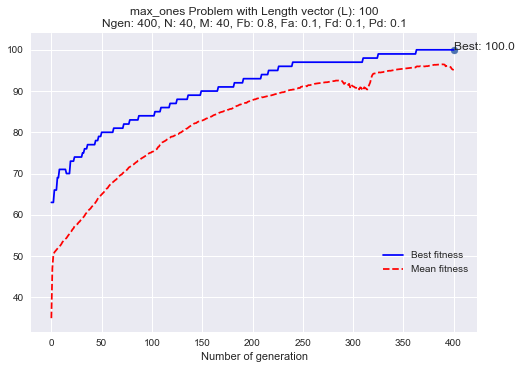

Best coral:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best solution: 100.0
Wall time: 41.5 s


In [14]:
import numpy as np
import seaborn as sns 
from cro import *

## ------------------------------------------------------
## Parameters initialization

Ngen = 400                 # Number of generations
N  = 40                    # MxN: reef size
M  = 40                    # MxN: reef size
Fb = 0.8                   # Broadcast prob.
Fa = 0.1                   # Asexual reproduction prob.
Fd = 0.1                   # Fraction of the corals to be eliminated in the depredation operator.
r0 = 0.7                   # Free/total initial proportion
k  = 3                     # Number of opportunities for a new coral to settle in the reef
Pd = 0.1                   # Depredation prob.
opt= 'max'                 # flag: 'max' for maximizing and 'min' for minimizing
L = 100
## ------------------------------------------------------

cro = CRO(Ngen, N, M, Fb, Fa, Fd, r0, k, Pd, opt, L, problem_name='max_ones')
%time (REEF, REEFpob, REEFfitness, ind_best, Bestfitness, Meanfitness) = cro.fit()

## Example II: feature selection Classification (max auc)

https://www.kaggle.com/primaryobjects/voicegender

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range). 20 features and I added 10 noisy!

[*Running Test v0.0.5] Initialization:  feature_selection max
Reef initialization: 0.685116630841
Best-fitness: 0.697735052942 
 0.0% completado 

Best-fitness: 0.9873815779 
 100% completado 



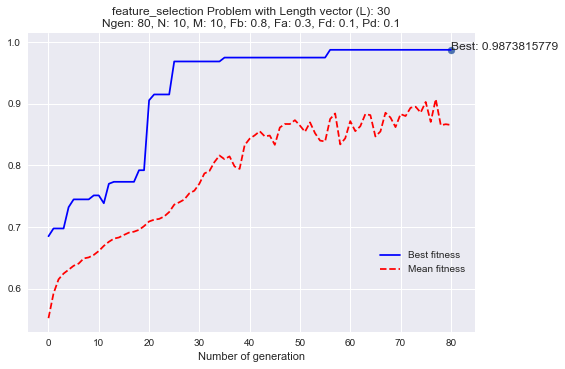

Best coral:  [0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
Best solution: 0.9873815779
Wall time: 1min 56s
['sd' 'Q25' 'centroid' 'meanfun' 'minfun' 'mindom']


In [17]:
## ------------------------------------------------------
## Parameters initialization

Ngen = 80                  # Number of generations
N  = 10                    # MxN: reef size
M  = 10                    # MxN: reef size
Fb = 0.8                   # Broadcast prob.
Fa = 0.3                   # Asexual reproduction prob.
Fd = 0.1                   # Fraction of the corals to be eliminated in the depredation operator.
r0 = 0.6                   # Free/total initial proportion
k  = 3                     # Number of opportunities for a new coral to settle in the reef
Pd = 0.1                   # Depredation prob.
opt= 'max'                 # flag: 'max' for maximizing and 'min' for minimizing
ke = 0.2
problem ='feature_selection'
## ------------------------------------------------------

import numpy as np
import seaborn as sns 
from cro import *
from utils import load_data 

dataset = load_data('voice')
L = dataset.data.shape[1] # number of features
X = dataset.data
y = dataset.target

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(2)

cro = CRO(Ngen, N, M, Fb, Fa, Fd, r0, k, Pd, opt, L, ke, seed=13, problem_name=problem, metric= 'auc', verbose=True)
%time (REEF, REEFpob, REEFfitness, ind_best, Bestfitness, Meanfitness) = cro.fit(X, y, clf)

names = np.array(dataset.feature_names)
print(names[REEFpob[:, ind_best]>0])

## Example III: feature selection, regression (min mse)

[*Running Test v0.0.5] Initialization:  feature_selection min
Reef initialization: 7.5128161116
Best-fitness: 7.5128161116 
 0.0% completado 

Best-fitness: 5.73537447597 
 100% completado 



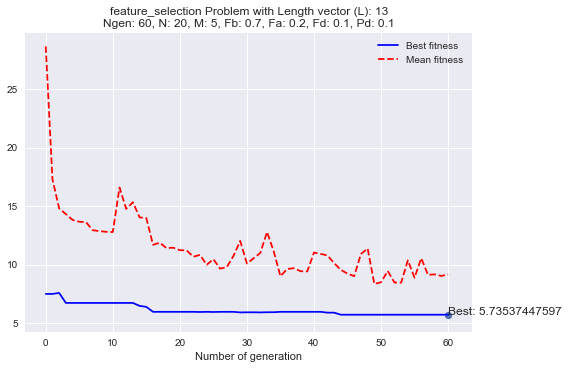

Best coral:  [1 0 1 0 1 1 1 1 0 0 1 1 1]
Best solution: 5.73537447597
Wall time: 3min 41s
['CRIM' 'INDUS' 'NOX' 'RM' 'AGE' 'DIS' 'PTRATIO' 'B' 'LSTAT']


In [8]:
import numpy as np
import seaborn as sns 
from cro import *

## ------------------------------------------------------
## Parameters initialization

Ngen = 60                  # Number of generations
N  = 20                    # MxN: reef size
M  = 5                     # MxN: reef size
Fb = 0.7                   # Broadcast prob.
Fa = 0.2                   # Asexual reproduction prob.
Fd = 0.1                   # Fraction of the corals to be eliminated in the depredation operator.
r0 = 0.7                   # Free/total initial proportion
k  = 3                     # Number of opportunities for a new coral to settle in the reef
Pd = 0.1                   # Depredation prob.
opt= 'min'                 # flag: 'max' for maximizing and 'min' for minimizing

problem ='feature_selection'
## ------------------------------------------------------

from sklearn import datasets, ensemble
from sklearn.metrics import r2_score, mean_squared_error   

dataset = datasets.load_boston()
L = dataset.data.shape[1] # number of features
X = dataset.data
y = dataset.target

params = {'n_estimators': 60, 'max_depth': 4, 'min_samples_split': 2}
clf = ensemble.GradientBoostingRegressor(**params)  

cro = CRO(Ngen, N, M, Fb, Fa, Fd, r0, k, Pd, opt, L, problem_name=problem, metric= mean_squared_error, verbose=True)
%time (REEF, REEFpob, REEFfitness, ind_best, Bestfitness, Meanfitness) = cro.fit(X, y, clf)

names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
print(names[REEFpob[:, ind_best]>0])